# Confusion Matrix and Interpretation Plots (Quality: 3-4,5-6, 7-8 Model)

## Load in Packages

In [11]:
library("ggplot2")
library("MASS")
library("caret")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("popbio")
library("e1071")

Warning message:
“package ‘caret’ was built under R version 4.1.2”
Loading required package: lattice


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract


The following object is masked from ‘package:reshape2’:

    smiths


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘popbio’


The following object is masked from ‘package:caret’:

    sensitivity




## Load in Data


In [9]:
wine = read.csv('WineQT.csv')

In [10]:
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


## Recode Quality Variable into Three Bins

In [18]:
wine$qualityR <- NA
wine$qualityR [wine$quality==3] <- 0
wine$qualityR [wine$quality==4] <- 0
wine$qualityR [wine$quality==5] <- 1
wine$qualityR [wine$quality==6] <- 1
wine$qualityR [wine$quality==7] <- 2
wine$qualityR [wine$quality==8] <- 2

In [19]:
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id,qualityR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0,1
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2,1
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3,1
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4,1
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5,1


## Data Wrangling

In [20]:
summary(wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 4.600   Min.   :0.1200   Min.   :0.0000   Min.   : 0.900  
 1st Qu.: 7.100   1st Qu.:0.3925   1st Qu.:0.0900   1st Qu.: 1.900  
 Median : 7.900   Median :0.5200   Median :0.2500   Median : 2.200  
 Mean   : 8.311   Mean   :0.5313   Mean   :0.2684   Mean   : 2.532  
 3rd Qu.: 9.100   3rd Qu.:0.6400   3rd Qu.:0.4200   3rd Qu.: 2.600  
 Max.   :15.900   Max.   :1.5800   Max.   :1.0000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 21.00       1st Qu.:0.9956  
 Median :0.07900   Median :13.00       Median : 37.00       Median :0.9967  
 Mean   :0.08693   Mean   :15.62       Mean   : 45.91       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 61.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :68.00       Max.   :289.00  

## Define the Order of the Dependent Variable

In [33]:
wine$qualityR = factor(wine$qualityR, levels = c("0", "1", "2"), ordered = TRUE) 

## Random Sampling 

In [35]:
samplesize = 0.60*nrow(wine)
set.seed(100)
index = sample(seq_len(nrow(wine)), size = samplesize)

## Dividing Data into Training and Test Set

In [24]:
samplesize = 0.60*nrow(wine)
set.seed(100)
index = sample(seq_len(nrow(wine)), size = samplesize)

### Creating Training and Test Set 

In [36]:
datatrain = wine[index,]
datatest = wine[-index,]

## Build Ordinal Logistic Regression Model

In [37]:
model= polr(qualityR ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar +
            chlorides + free.sulfur.dioxide + total.sulfur.dioxide + density + pH + sulphates +
            alcohol, data = wine, Hess = TRUE)

In [38]:
summary (model)

Call:
polr(formula = qualityR ~ fixed.acidity + volatile.acidity + 
    citric.acid + residual.sugar + chlorides + free.sulfur.dioxide + 
    total.sulfur.dioxide + density + pH + sulphates + alcohol, 
    data = wine, Hess = TRUE)

Coefficients:
                          Value Std. Error  t value
fixed.acidity         -0.330008   0.082411  -4.0044
volatile.acidity      -4.405687   0.661679  -6.6583
citric.acid            0.845356   0.790894   1.0689
residual.sugar        -0.060996   0.068254  -0.8937
chlorides             -8.934343   2.368258  -3.7725
free.sulfur.dioxide    0.001840   0.011773   0.1563
total.sulfur.dioxide  -0.004261   0.003804  -1.1202
density              273.446919   1.637315 167.0094
pH                    -4.146601   0.863993  -4.7993
sulphates              1.777010   0.544503   3.2635
alcohol                1.110960   0.094846  11.7133

Intercepts:
    Value    Std. Error t value 
0|1 261.2794   1.6791   155.6049
1|2 268.2894   1.6758   160.0944

Residual Devianc

## Compute Confusion Matrix and Misclassification Error

In [40]:
predict.quality = predict(model,datatest)
table(datatest$qualityR, predict.quality)
mean(as.character(datatest$qualityR) != as.character(predict.quality))

   predict.quality
      0   1   2
  0   0  18   0
  1   1 352  18
  2   0  46  23

[1] 0.1812227

## Interpretation of the Confusion Matrix 

In the test dataset, 0 times the below average "0" wine quality category is identified correctly.
We observe that the model identifies below average wine poorly.
This is because there is an inadequate representation of "below average" wine quality category in the traning
dataset.

In the test dataset, 352 times the average "1" wine quality category is identified correctly. 

In the test dataset, 23 times the above average "2" wine quality category is identified correctly.

 
Using the confusion matrix, we find that the misclassification error for our model is 18%.

## Interpretation Using Plots: Plotting the Effects 

In [42]:
library("effects")

Warning message:
“package ‘effects’ was built under R version 4.1.2”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 4.1.2”
Use the command
    lattice::trellis.par.set(effectsTheme())
  to customize lattice options for effects plots.
See ?effectsTheme for details.



### Fixed Acidity


fixed.acidity effect (probability) for 0
fixed.acidity
        4.6         7.4          10          13          16 
0.003745705 0.009383534 0.021852374 0.056715093 0.139277364 

fixed.acidity effect (probability) for 1
fixed.acidity
      4.6       7.4        10        13        16 
0.8026304 0.9036027 0.9393070 0.9284919 0.8551744 

fixed.acidity effect (probability) for 2
fixed.acidity
        4.6         7.4          10          13          16 
0.193623937 0.087013809 0.038840610 0.014793010 0.005548189 

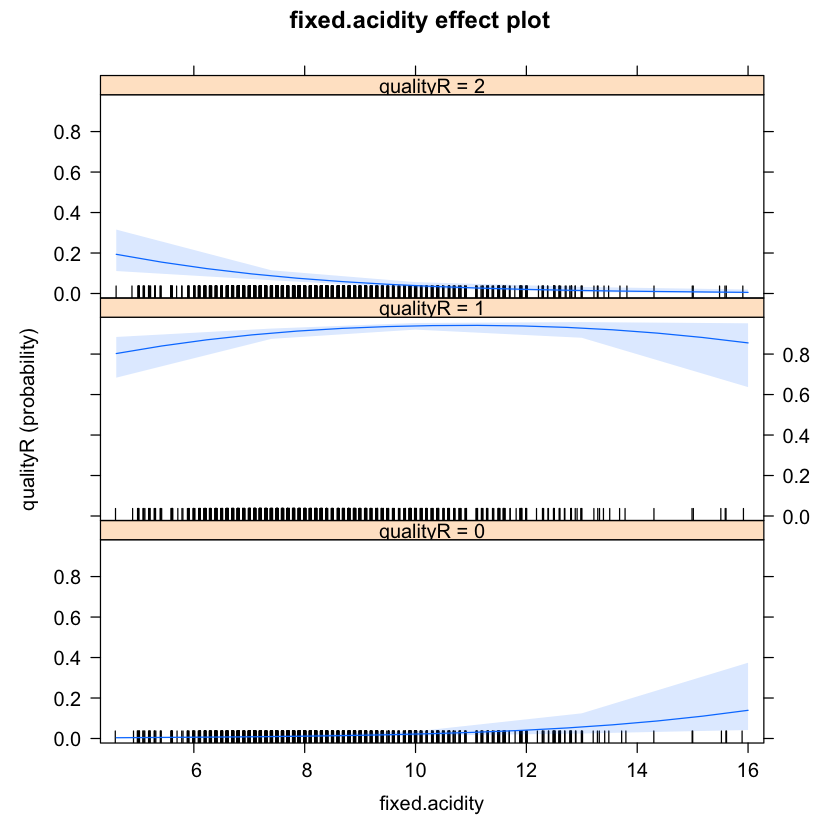

In [51]:
Effect(focal.predictors = "fixed.acidity",model)
plot(Effect(focal.predictors = "fixed.acidity",model))

### Volatile Acidity


volatile.acidity effect (probability) for 0
volatile.acidity
        0.1         0.5         0.8           1           2 
0.001909428 0.011022147 0.040115153 0.091627614 0.892041480 

volatile.acidity effect (probability) for 1
volatile.acidity
      0.1       0.5       0.8         1         2 
0.6774838 0.9140440 0.9387396 0.8995018 0.1078493 

volatile.acidity effect (probability) for 2
volatile.acidity
         0.1          0.5          0.8            1            2 
0.3206067810 0.0749338450 0.0211452954 0.0088705950 0.0001092469 

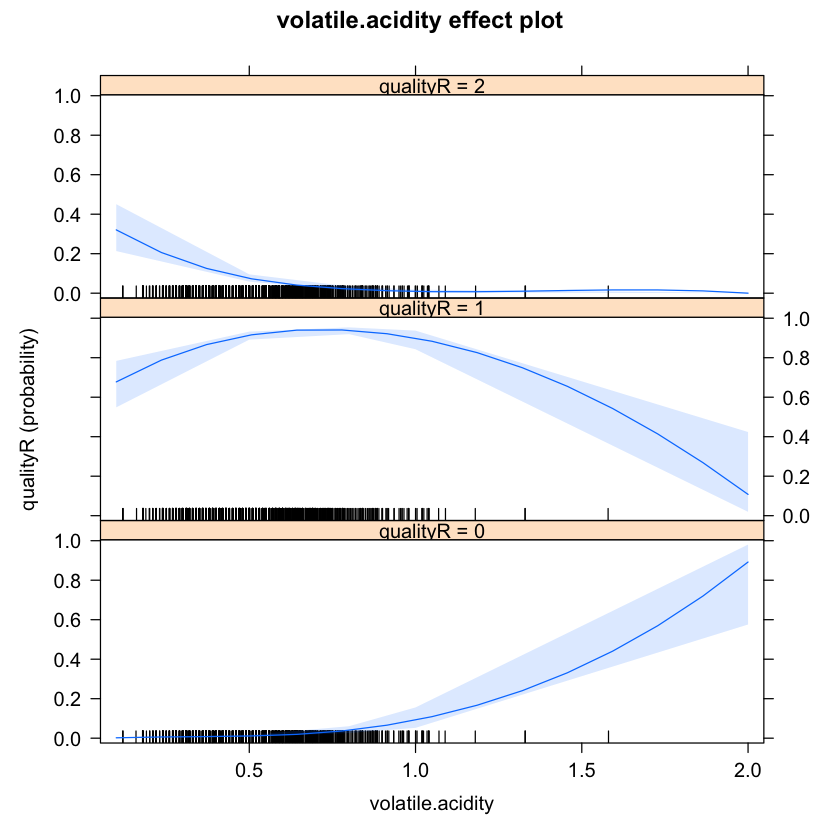

In [53]:
Effect(focal.predictors = "volatile.acidity",model)
plot(Effect(focal.predictors = "volatile.acidity",model))

### Citric Acid


citric.acid effect (probability) for 0
citric.acid
          0         0.2         0.5         0.8           1 
0.015799763 0.013374963 0.010410120 0.008097103 0.006846212 

citric.acid effect (probability) for 1
citric.acid
        0       0.2       0.5       0.8         1 
0.9309580 0.9241877 0.9105535 0.8923234 0.8773555 

citric.acid effect (probability) for 2
citric.acid
         0        0.2        0.5        0.8          1 
0.05324227 0.06243738 0.07903634 0.09957945 0.11579834 

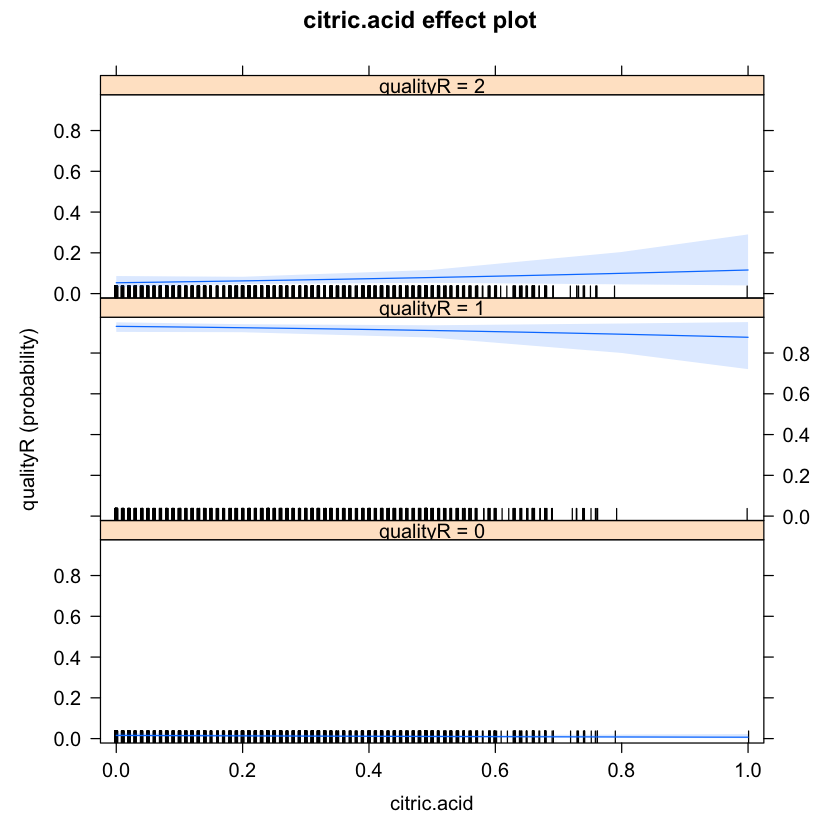

In [55]:
Effect(focal.predictors = "citric.acid",model)
plot(Effect(focal.predictors = "citric.acid",model))

### Residual Sugar


residual.sugar effect (probability) for 0
residual.sugar
       0.9          5          8         10         20 
0.01144997 0.01465561 0.01754684 0.01977843 0.03580439 

residual.sugar effect (probability) for 1
residual.sugar
      0.9         5         8        10        20 
0.9162425 0.9281205 0.9343380 0.9373955 0.9404610 

residual.sugar effect (probability) for 2
residual.sugar
       0.9          5          8         10         20 
0.07230751 0.05722390 0.04811520 0.04282605 0.02373458 

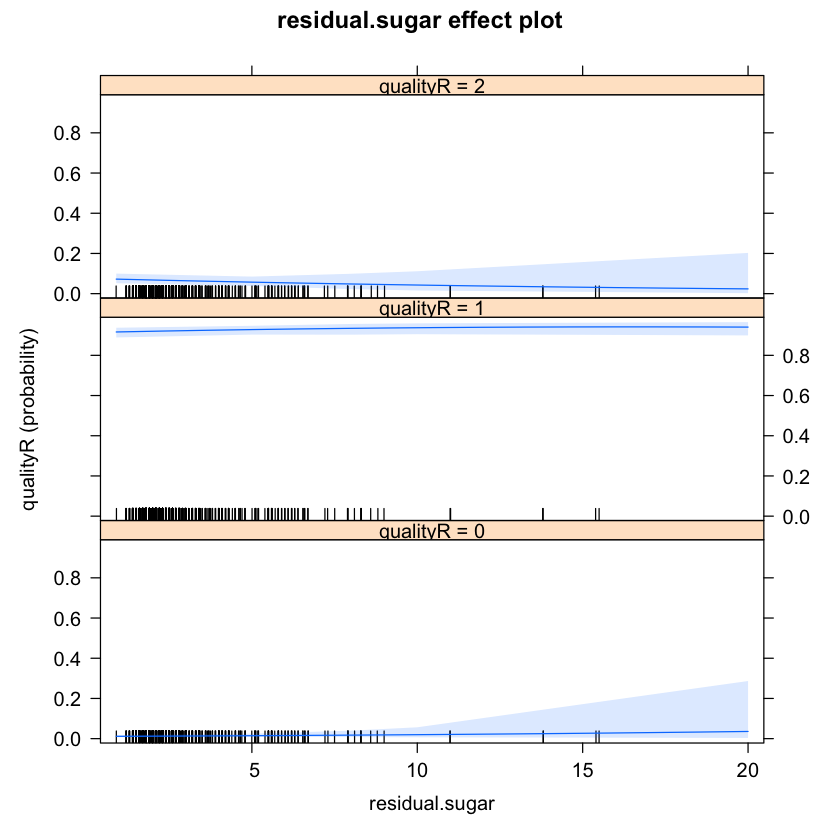

In [65]:
Effect(focal.predictors = "residual.sugar",model)
plot(Effect(focal.predictors = "residual.sugar",model))

### Chlorides


chlorides effect (probability) for 0
chlorides
       0.01         0.2         0.3         0.5         0.6 
0.006393624 0.033943836 0.079067827 0.338897397 0.556068864 

chlorides effect (probability) for 1
chlorides
     0.01       0.2       0.3       0.5       0.6 
0.8705700 0.9410061 0.9105265 0.6593446 0.4432109 

chlorides effect (probability) for 2
chlorides
        0.01          0.2          0.3          0.5          0.6 
0.1230364234 0.0250500509 0.0104056661 0.0017580099 0.0007202097 

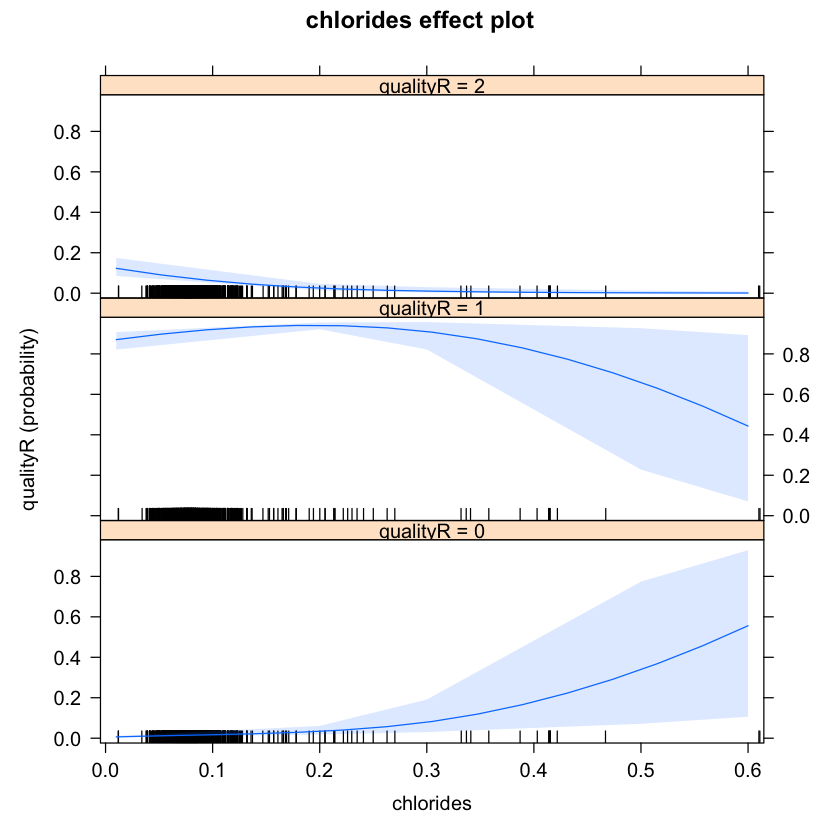

In [66]:
Effect(focal.predictors = "chlorides",model)
plot(Effect(focal.predictors = "chlorides",model))

### Free Sulfur Dioxide


free.sulfur.dioxide effect (probability) for 0
free.sulfur.dioxide
         1         20         30         50         70 
0.01297336 0.01253314 0.01230741 0.01186791 0.01144394 

free.sulfur.dioxide effect (probability) for 1
free.sulfur.dioxide
        1        20        30        50        70 
0.9227561 0.9210611 0.9201367 0.9182204 0.9162128 

free.sulfur.dioxide effect (probability) for 2
free.sulfur.dioxide
         1         20         30         50         70 
0.06427051 0.06640574 0.06755585 0.06991166 0.07234326 

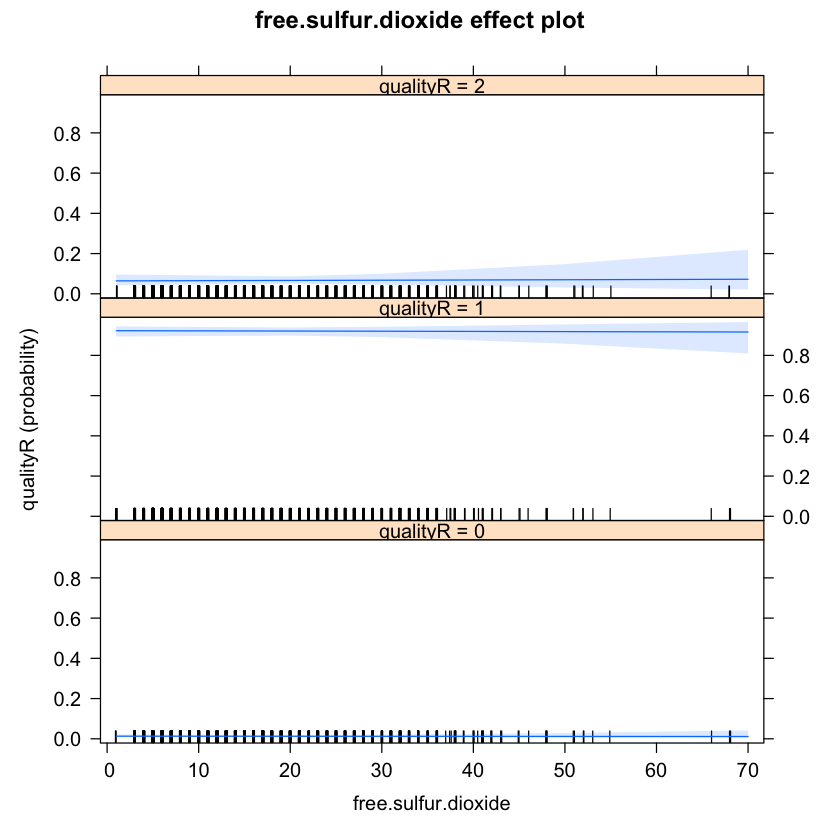

In [67]:
Effect(focal.predictors = "free.sulfur.dioxide",model)
plot(Effect(focal.predictors = "free.sulfur.dioxide",model))

### Total Sulfur Dioxide


total.sulfur.dioxide effect (probability) for 0
total.sulfur.dioxide
         6         80        100        200        300 
0.01067861 0.01457942 0.01585581 0.02407693 0.03640297 

total.sulfur.dioxide effect (probability) for 1
total.sulfur.dioxide
        6        80       100       200       300 
0.9121382 0.9279106 0.9310830 0.9406217 0.9402578 

total.sulfur.dioxide effect (probability) for 2
total.sulfur.dioxide
         6         80        100        200        300 
0.07718324 0.05750995 0.05306119 0.03530132 0.02333926 

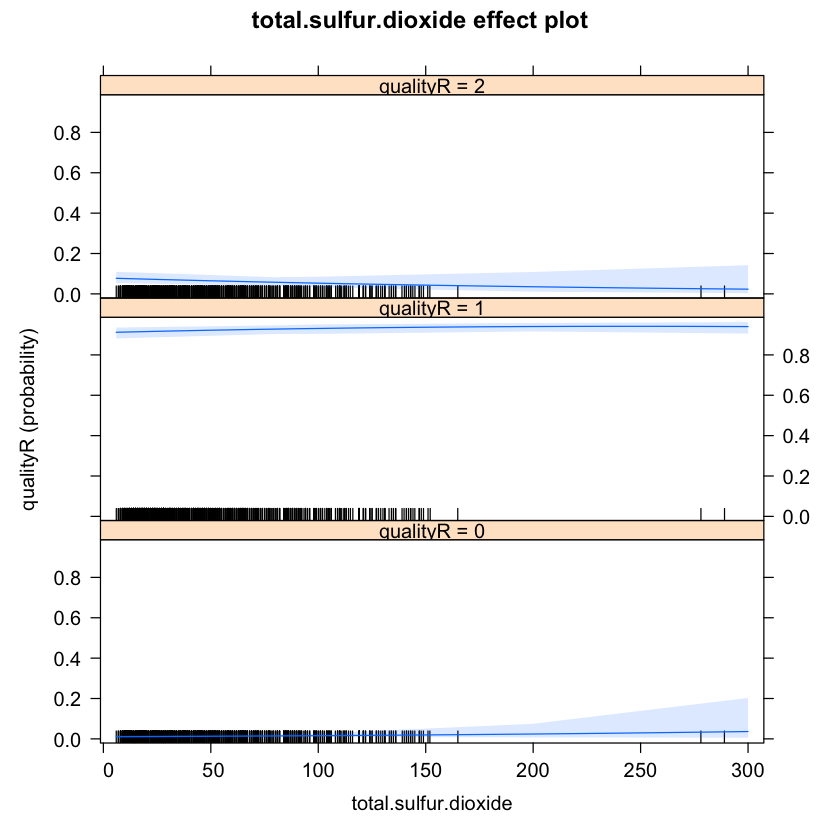

In [68]:
Effect(focal.predictors = "total.sulfur.dioxide",model)
plot(Effect(focal.predictors = "total.sulfur.dioxide",model))

### Density


density effect (probability) for 0
density
     0.9901      0.9935      0.9969           1       1.004 
0.072720490 0.030021754 0.012067829 0.005205832 0.001749727 

density effect (probability) for 1
density
   0.9901    0.9935    0.9969         1     1.004 
0.9158988 0.9416366 0.9191119 0.8476614 0.6582922 

density effect (probability) for 2
density
    0.9901     0.9935     0.9969          1      1.004 
0.01138067 0.02834160 0.06882027 0.14713276 0.33995810 

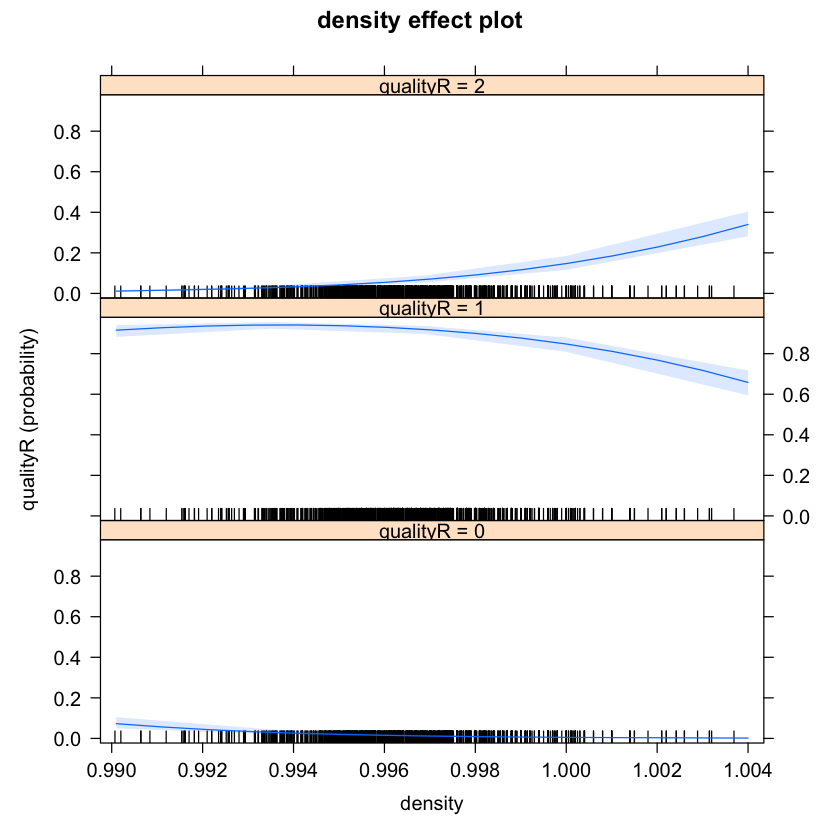

In [71]:
Effect(focal.predictors = "density",model)
plot(Effect(focal.predictors = "density",model))

### pH


pH effect (probability) for 0
pH
        2.7         3.1         3.4         3.7           4 
0.001014512 0.005305499 0.018168836 0.060328184 0.182164511 

pH effect (probability) for 1
pH
      2.7       3.1       3.4       3.7         4 
0.5283748 0.8499380 0.9353146 0.9258050 0.8137988 

pH effect (probability) for 2
pH
        2.7         3.1         3.4         3.7           4 
0.470610725 0.144756509 0.046516572 0.013866804 0.004036736 

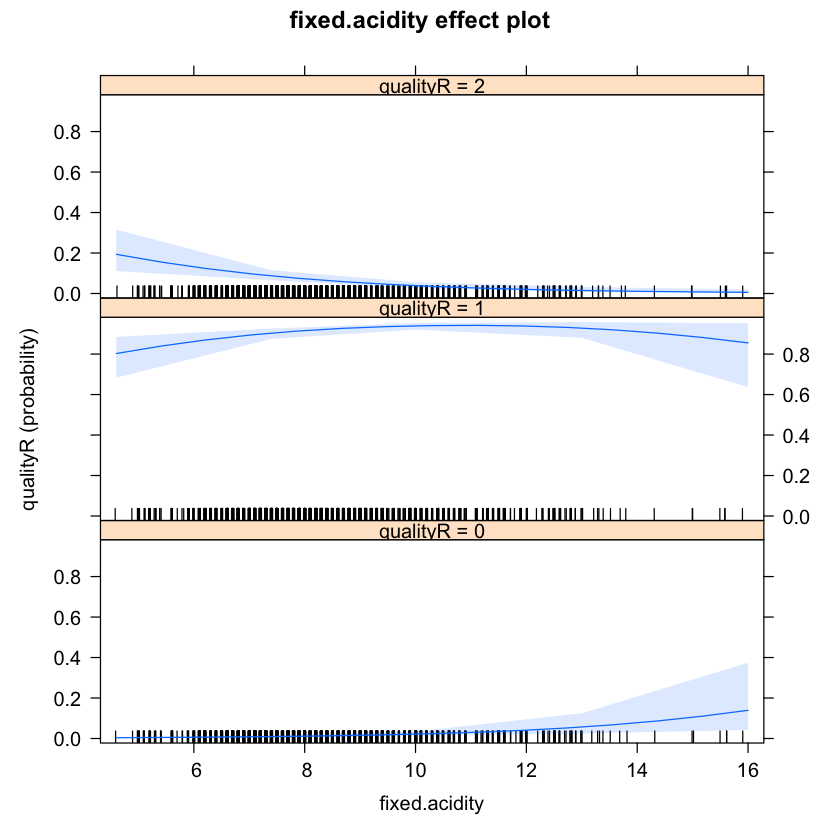

In [72]:
Effect(focal.predictors = "pH",model)
plot(Effect(focal.predictors = "fixed.acidity",model))

### Sulphates 


sulphates effect (probability) for 0
sulphates
       0.33        0.75         1.2         1.6           2 
0.022393042 0.010742981 0.004857529 0.002392169 0.001176583 

sulphates effect (probability) for 1
sulphates
     0.33      0.75       1.2       1.6         2 
0.9396887 0.9125054 0.8390598 0.7240936 0.5649491 

sulphates effect (probability) for 2
sulphates
      0.33       0.75        1.2        1.6          2 
0.03791823 0.07675165 0.15608264 0.27351427 0.43387434 

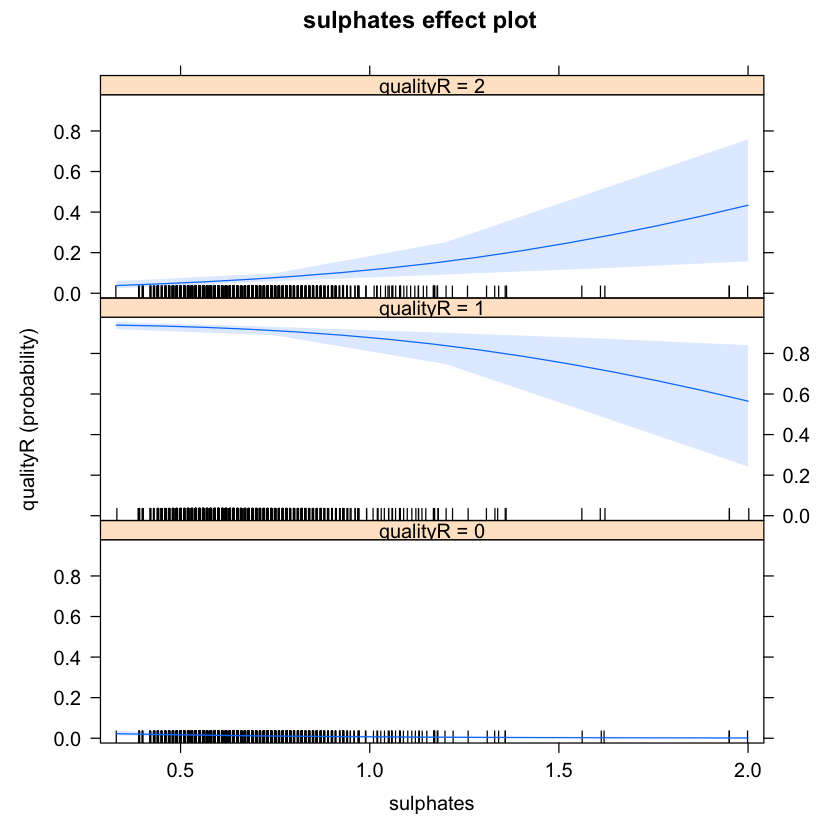

In [73]:
Effect(focal.predictors = "sulphates",model)
plot(Effect(focal.predictors = "sulphates",model))

### Alcohol


alcohol effect (probability) for 0
alcohol
         8.4           10           12           13           15 
1.100732e-01 2.048170e-02 2.261531e-03 7.457238e-04 8.089082e-05 

alcohol effect (probability) for 1
alcohol
       8.4         10         12         13         15 
0.88268075 0.93813031 0.71289786 0.45180143 0.08215834 

alcohol effect (probability) for 2
alcohol
        8.4          10          12          13          15 
0.007246012 0.041387990 0.284840614 0.547452842 0.917760774 

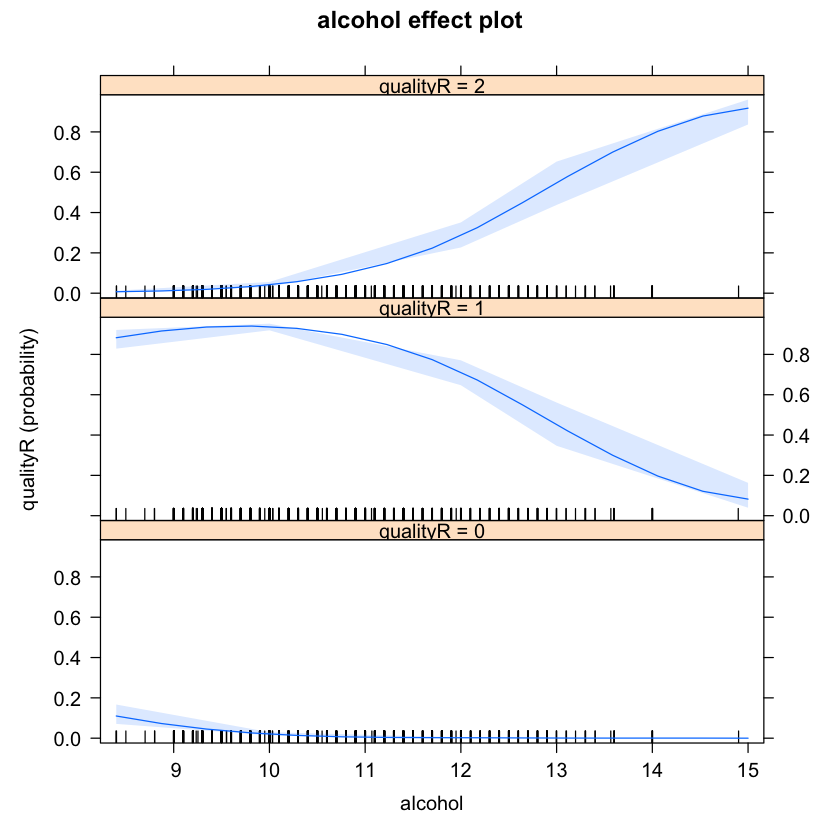

In [74]:
Effect(focal.predictors = "alcohol",model)
plot(Effect(focal.predictors = "alcohol",model))